In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
from keras import layers
from keras.datasets import mnist
from torch import from_numpy

from machine_learning.classes import OptimizerConfigs, TrainConfigs
from machine_learning.autoencoders.convolutional_autoencoder import init_encoder, init_decoder, load, save
from machine_learning.autoencoders.variational_autoencoder import VariationalAutoEncoder
from machine_learning.strings import mse_loss_str, relu_str
from machine_learning.utils.utils_mnist import load_mnist_data_for_autoencoder
from machine_learning.utils.utils_nn import init_loss, train
from machine_learning.utils.utils_plot import plot_mnist_images

In [2]:
plt.style.use('seaborn-whitegrid')
sns.set_color_codes()

figsize = (20, 4)

In [5]:
torch.manual_seed(0)

### data

In [8]:
dirpath = "../data/pytorch_mnist"
X_train_loader, X_val_loader, X_test_loader = load_mnist_data_for_autoencoder(dirpath)
X_test, _ = next(iter(X_test_loader))

### model and training

In [23]:
lr = 1e-4
weight_decay = 1e-5
optimizer_configs = OptimizerConfigs(lr=lr, weight_decay=weight_decay)

n_epochs = 50
patience = 50

verbose = True
verbose_freq = n_epochs / n_epochs

configs = TrainConfigs(optimizer_configs=optimizer_configs, n_epochs=n_epochs, patience=patience)

criterion = init_loss(mse_loss_str, "sum")

In [24]:
encoder_ = init_encoder()
decoder_ = init_decoder()

In [25]:
z_dim = 4
model = VariationalAutoEncoder(relu_str, encoder_, relu_str, decoder_, z_dim)

In [26]:
best_state_dict, best_score, best_epoch = train(configs, model, X_train_loader, X_val_loader, 
                                                criterion, verbose, verbose_freq)

epoch 0, train loss 199.90849210611978, val loss 168.76127018229167
epoch 1, train loss 161.25330212402343, val loss 154.83149153645834
epoch 2, train loss 149.18721931966147, val loss 142.98665657552084
epoch 3, train loss 137.64634419759113, val loss 132.73061507161458
epoch 4, train loss 124.21058752441407, val loss 118.55970540364584
epoch 5, train loss 115.13521805826822, val loss 111.74273974609375
epoch 6, train loss 108.66103951009114, val loss 105.48778206380209
epoch 7, train loss 103.3571371866862, val loss 101.49703059895833
epoch 8, train loss 100.58629671223959, val loss 99.69686800130208
epoch 9, train loss 99.30595910644531, val loss 98.81249658203124
epoch 10, train loss 98.54771502685547, val loss 98.06056868489583
epoch 11, train loss 97.8557592569987, val loss 97.39622884114583
epoch 12, train loss 97.31467456054688, val loss 96.99722802734375
epoch 13, train loss 96.92818404134114, val loss 96.60618180338541
epoch 14, train loss 96.6853803914388, val loss 96.404145

In [27]:
best_score, best_epoch

(91.9193935546875, 49)

### plotting

In [28]:
n_samples = 10
n_rows = 2

In [29]:
encoder_ = init_encoder()
decoder_ = init_decoder()

best_model = VariationalAutoEncoder(relu_str, encoder_, relu_str, decoder_, z_dim)
best_model.load_state_dict(best_state_dict)

<All keys matched successfully>

In [30]:
best_model.eval()
samples = X_test[:n_samples]
samples_hat = best_model(samples)
samples_hat = samples_hat.detach().numpy()

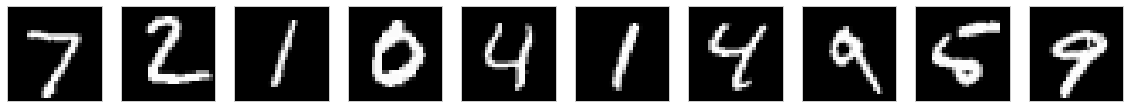

In [31]:
plot_mnist_images(samples, figsize)

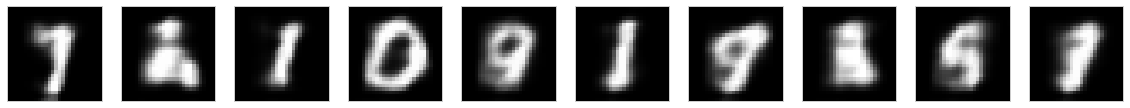

In [32]:
plot_mnist_images(samples_hat, figsize)

### generating

In [33]:
z_hat = best_model.p.sample((10, 8, 4, 4))

In [34]:
x_hat = best_model.decode(z_hat)
x_hat = x_hat.detach().numpy()

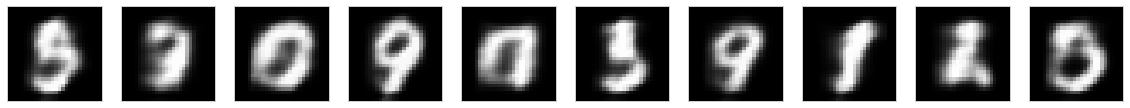

In [35]:
plot_mnist_images(x_hat, figsize)